# QUESTION 2 a)

In [1]:
import numpy as np
import pandas
from scipy.integrate import  trapz, cumtrapz
from scipy.optimize import minimize
from scipy.special import factorial
import emcee
import corner 
import matplotlib
import matplotlib.pyplot as plt

In the following two cells, i have imported my data in and defined what my model, prior, likelihood and posterior are for the first model.
Note that we have to take into account of every combination of 'x' that i have labeled, within our likelihood.
Also, note that i have used log of the posterior as this is much more useful than just the posterior.

In [2]:
data_10 = np.loadtxt("data_10hr.txt")

In [3]:
def model1(t, L0):
    B=5
    return B+L0

def prior1(L0, Lmin=0, Lmax = 10):
    return ( np.heaviside(L0, Lmin)-np.heaviside(L0-Lmax, 0.5) ) / ( Lmax-Lmin )

def likelihood1(L0, data_10):
    t = np.arange(len(data_10))
    x = data_10 - model1(t, L0)
    return np.exp(-0.5*np.sum(x**2) - (len(data_10)/2.)*np.log(2*np.pi))

def log_posterior1(L0, data_10):
    Prior1 = prior1(L0)
    return np.log(Prior1*likelihood1(L0, data_10))

In the following cell I find the evidence, similar to hopw i did in the first question.
I also plot the Posterior against all the values of L0 that i use.
We see that the PDF peaks at a value of approx L0 = 1.1 (We see later on that this estimate varies significantly when considering more data).

C:\Users\steve\AppData\Local\Temp\ipykernel_8652\1856062237.py:15: RuntimeWarning: divide by zero encountered in log
  return np.log(Prior1*likelihood1(L0, data_10))


L0max = 1.1111111111111112


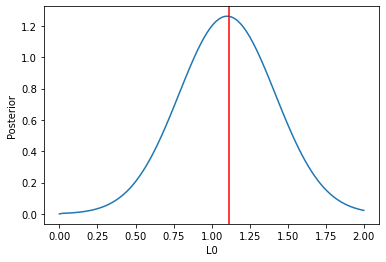

In [4]:
#Evidence for Model 1
L0values = np.linspace(0, 10, 5000)
Z10 = trapz(np.array([np.exp(log_posterior1(x, data_10)) for x in L0values]),x=L0values)



Lvalues = np.linspace(0, 2, 100)
post = np.array([ np.exp(log_posterior1(L, data_10))/Z10 for L in Lvalues]) 
plt.plot(Lvalues, post)
plt.xlabel("L0")
plt.ylabel("Posterior")


max_y = max(post)  # Find the maximum y value
max_x = Lvalues[post.argmax()]  # Find the x value corresponding to the maximum y value
print('L0max =', max_x)
plt.axvline(x = max_x, color = 'r', label = 'L0max')
plt.show()

In the following two cells, I have imported my data for 24 hours.
I have also used the log of the posterior to plot the graph but taking into account of data_24.

In [5]:
data_24 = np.loadtxt("data_24hr.txt")

print(data_24)

[7.108842 5.360705 5.871565 4.441087 6.87764  6.049399 5.587317 6.687828
 7.390521 5.64618  6.050657 5.293207 7.012353 6.188524 5.939938 5.429079
 6.713578 7.634892 4.601459 6.084144 6.368803 5.275031 4.967284 5.09363 ]


C:\Users\steve\AppData\Local\Temp\ipykernel_8652\1856062237.py:15: RuntimeWarning: divide by zero encountered in log
  return np.log(Prior1*likelihood1(L0, data_10))


L0max = 0.98989898989899


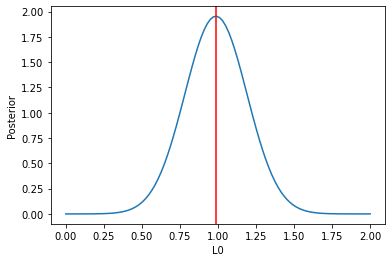

In [6]:
Z24 = trapz(np.array([np.exp(log_posterior1(x, data_24)) for x in L0values]), x=L0values)


post1 = np.array([ np.exp(log_posterior1(L, data_24))/Z24 for L in Lvalues]) 
plt.plot(Lvalues, post1)

plt.xlabel("L0")
plt.ylabel("Posterior")
max_y1 = max(post1)  # Find the maximum y value
max_x1 = Lvalues[post1.argmax()]  # Find the x value corresponding to the maximum y value
print('L0max =', max_x1)
plt.axvline(x = max_x1, color = 'r', label = 'L0max')
plt.show()

Finally, I have done the same for data_100.

In [7]:
data_100 = np.loadtxt("data_100hr.txt")

print(data_100)

[7.108842 5.360705 5.871565 4.441087 6.87764  6.049399 5.587317 6.687828
 7.390521 5.64618  6.050657 5.293207 7.012353 6.188524 5.939938 5.429079
 6.713578 7.634892 4.601459 6.084144 6.368803 5.275031 4.967284 5.09363
 5.419449 4.646027 5.646942 3.721937 5.543298 6.230539 6.283318 5.446628
 6.366651 6.791042 6.01529  4.662983 6.547594 5.760078 5.588885 4.817716
 6.315821 5.270138 3.749252 3.539307 5.973281 6.363832 3.451723 5.62603
 7.669242 5.214911 4.51425  5.687735 4.057589 4.373799 5.35329  5.298983
 5.135164 6.329077 7.122212 5.380757 5.747005 3.763214 6.994545 5.424827
 5.466281 5.704401 4.357693 6.230735 4.740303 5.445245 3.809856 3.6856
 6.139285 5.943305 5.942797 4.676583 6.738519 4.251049 4.807625 6.45708
 5.317884 4.644951 3.504907 3.452065 6.795696 3.150357 5.56889  5.454145
 4.433454 5.450756 3.79072  4.701273 4.311919 6.012713 6.475723 4.686982
 3.980332 3.552667 6.521594 4.750201]


C:\Users\steve\AppData\Local\Temp\ipykernel_8652\1856062237.py:15: RuntimeWarning: divide by zero encountered in log
  return np.log(Prior1*likelihood1(L0, data_10))


L0max = 0.42424242424242425


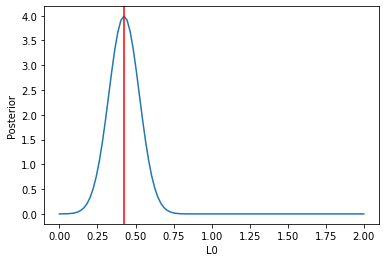

In [8]:
Z100 = trapz(np.array([np.exp(log_posterior1(x, data_100)) for x in L0values]),x=L0values)


post2 = np.array([ np.exp(log_posterior1(L, data_100))/Z100 for L in Lvalues]) 
plt.plot(Lvalues, post2)

plt.xlabel("L0")
plt.ylabel("Posterior")
max_y2 = max(post2)  # Find the maximum y value
max_x2 = Lvalues[post2.argmax()]  # Find the x value corresponding to the maximum y value
print('L0max =', max_x2)
plt.axvline(x = max_x2, color = 'r', label = 'L0max')
plt.show()

In the final graph, we clearly see that taking into account of more data, allowed and estimation of the paramter L0 to be much more accurate, taking it from arppox, 1.11 to approx. 0.42.

# QUESTION 2 b)

In the following cells, i label my second model and find the prior of this new model (including two paramters) by using a Jeffreys prior.
Note that i have used the log of this prior because it makes plotting our corner plots with ease.
Interstingly, changing the way we calculate our priors - Uniform or Jeffreys - there is no difference in our final value of tau and L0 measured.
Np.full enables us to create an array, that has a shape that matches the length of our data, and assigns each value to be the same factor - in this case it assigns the model equation to each value.

In [9]:
def model2(times, A, tau):
    B=5
    return np.full((len(times),), B) + A*np.exp(-times/tau)

In [10]:
def prior111(A, tau):
    Amin = 0.1
    Amax = 10
    tmin = 0.1
    tmax = 100
    Ajefressprior = 1/A*Log(Amax/Amin)
    tjefressprior = 1/t*Log(tmax/tmin) 
    return Ajefressprior * tjefressprior

#useful to use log of this 
def log_prior11(A, tau):
    Amin = 0.1
    Amax = 10
    tmin = 0.1
    tmax = 100
    Ajefressprior = 1/A*np.log(Amax/Amin)
    tjefressprior = 1/tau*np.log(tmax/tmin)
    if A>Amin and A<Amax and tau>tmin and tau<tmax:
        return np.log(Ajefressprior) + np.log(tjefressprior)
    else:
        return -np.inf

In the following cell, i define the likelihood and its log (again, for ease).

In [11]:
def likelihood222(A, tau, data):
    times = np.arange(len(data))
    return (np.exp(-0.5*np.sum((data-model2(times, A, tau))**2))*np.exp((0.5*len(data))))/(2*np.pi)

#want log of this for ease

def log_likelihood11(A, tau, data):
    return np.log(likelihood222(A, tau, data))
#     times = np.arange(len(data))
#     return np.log(np.exp(-0.5*np.sum((data-model2(times, A, tau))**2))*np.exp((0.5*len(data))))*np.log(2*np.pi)

Finally, i calculate the log posterior of the second model.
An issue arose where the code was producing 'nan' values, however this was fixed by imposing a negative infinity condiiton withi the function. 
To be able to create our corner plot, I had to assign A and Tau as different vectors within 'parameters' within the parameter in the log_posterior112 function.

In [12]:

def log_posterior11(A, tau, data):
    log_prior = log_prior11(A, tau)
    if log_prior == -np.inf: 
        return log_prior
    else:
        return (log_prior + log_likelihood11(A, tau, data))

def log_posterior112(parameters, data=data_10):
    A = parameters[0]
    tau = parameters[1]
    return log_posterior11(A, tau, data)


Now, we import emcee and create our corner plot for data_10. By doing so we see a visual represntation of how the paramter varies.
Note, that there is a dense region approx between 20-50 for tau and this is situated between 1 < A < 1.3.

C:\Users\steve\anaconda3\lib\site-packages\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


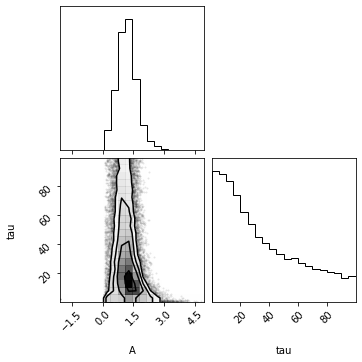

('L0, Tau', array([ 0.56639257, 96.9525944 ]))


In [25]:
import emcee

ndim = 2 # our problem is 2 dimensional
nwalkers = 10 # instead of a single chain this algorithm uses several

x0 = np.random.randn(nwalkers, ndim) # choose random starting points 

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior112) # setup the sampler

state = sampler.run_mcmc(x0, 100) # run  burn in iterations

sampler.reset() 

sampler.run_mcmc(state, 500000) # run algorithm for  iterations

samples = sampler.get_chain(flat=True, thin=200) # get the thinned mcmc chain

corner.corner(samples, labels=['A', 'tau'])

plt.show()
print(('L0, Tau', samples[-1]))

From above we see that the final iteration produces a value of L0 = 0.57 and Tau = 96.95 hours.
In the following cell, we redfine our log posterior but use our dataset for 24 hours (more data).
Interestingly, we see our 'random walkers' becoming more centralised around 10-30.

C:\Users\steve\anaconda3\lib\site-packages\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


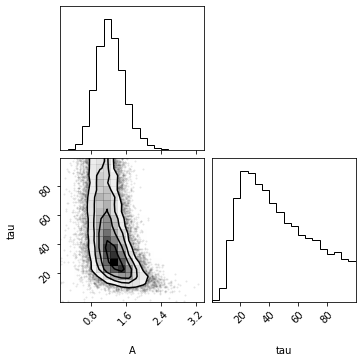

('L0, Tau', array([ 1.36831911, 65.56534731]))


In [26]:
def log_posterior113(parameters, data=data_24):
    A = parameters[0]
    tau = parameters[1]
    return log_posterior11(A, tau, data)

import emcee

ndim = 2 # our problem is 2 dimensional
nwalkers = 10 # instead of a single chain this algorithm uses several

x0 = np.random.randn(nwalkers, ndim) # choose random starting points 

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior113) # setup the sampler

state = sampler.run_mcmc(x0, 100) # run  burn in iterations

sampler.reset() 

sampler.run_mcmc(state, 500000) # run algorithm for  iterations

samples1 = sampler.get_chain(flat=True, thin=200) # get the thinned mcmc chain

corner.corner(samples1, labels=['A', 'tau'])

plt.show()
print(('L0, Tau', samples1[-1]))

From above, we see that the last iteration produces the values L0 = 1.37 and Tau = 65.57 hours.
Finally, we do the same for the dataset with 100 hours.

C:\Users\steve\anaconda3\lib\site-packages\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


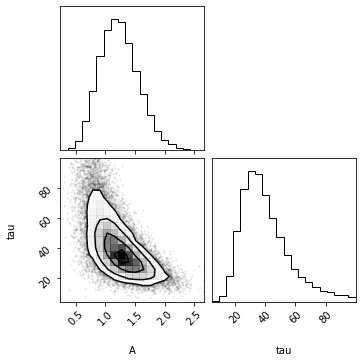

('L0, Tau', array([ 1.25533106, 47.68562887]))


In [27]:
def log_posterior114(parameters, data=data_100):
    A = parameters[0]
    tau = parameters[1]
    return log_posterior11(A, tau, data)

import emcee

ndim = 2 # our problem is 2 dimensional
nwalkers = 10 # instead of a single chain this algorithm uses several

x0 = np.random.randn(nwalkers, ndim) # choose random starting points 

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior114) # setup the sampler

state = sampler.run_mcmc(x0, 100) # run  burn in iterations

sampler.reset() 

sampler.run_mcmc(state, 500000) # run algorithm for  iterations

samples2 = sampler.get_chain(flat=True, thin=200) # get the thinned mcmc chain

corner.corner(samples2, labels=['A', 'tau'])

plt.show()
print(('L0, Tau', samples2[-1]))

From the above, we see that the last iteration produces the values Tau = 47.69 hours and L0 = approx. 1.26.